# Installing Packages

In [47]:
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib

# Importing libraries

In [48]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [15]:
data=pd.read_csv('Add_sales_data_2018.csv')

In [16]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [17]:
data.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [18]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [19]:
print('There are ',data.shape[0],'rows and ',data.shape[1],'columns in the dataset.')

There are  205 rows and  7 columns in the dataset.


In [20]:
print('There are',data.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [21]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


# Correlation between Variables

In [23]:
c = data.corr()
c

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


# Correlaion Matrix

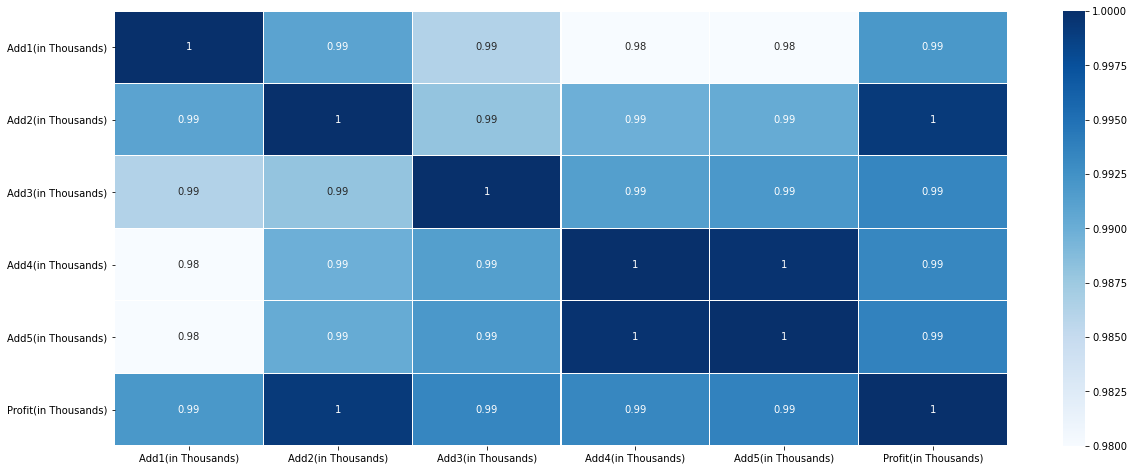

In [24]:
plt.subplots(figsize=(20,8))
sns.heatmap(c,vmin=0.98,vmax=1,annot=True,linewidth=0.2,cmap='Blues')
plt.show()

Here we can infer that a direct correlation with profit from how it is shown in the heatmap of the correlation plot.From the heatmap using correlation matrix,the amount spent by Add4 and Add5 are correlated.

# Outliers detection in the target variable

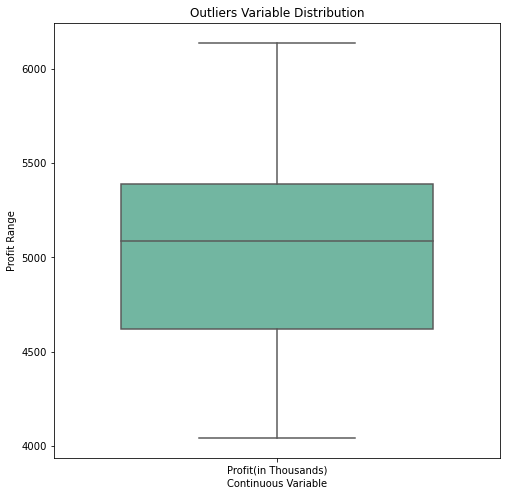

In [25]:
outliers = ['Profit(in Thousands)']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=data[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

# Histogram on profit

In [26]:
data['Profit(in Thousands)'].mean()

5059.630234146345

C:\Users\kavit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


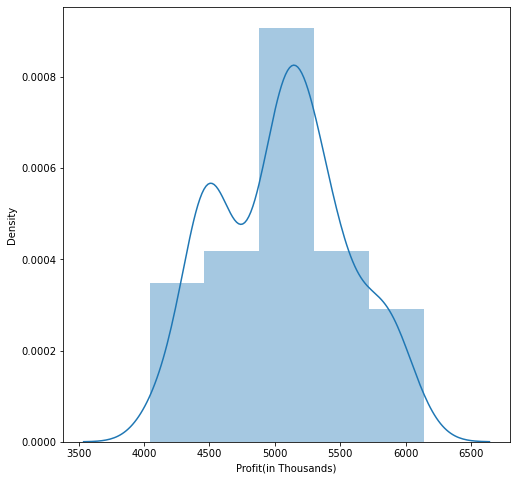

In [27]:
sns.distplot(data['Profit(in Thousands)'],bins=5,kde=True)
plt.show()

# Pair plot

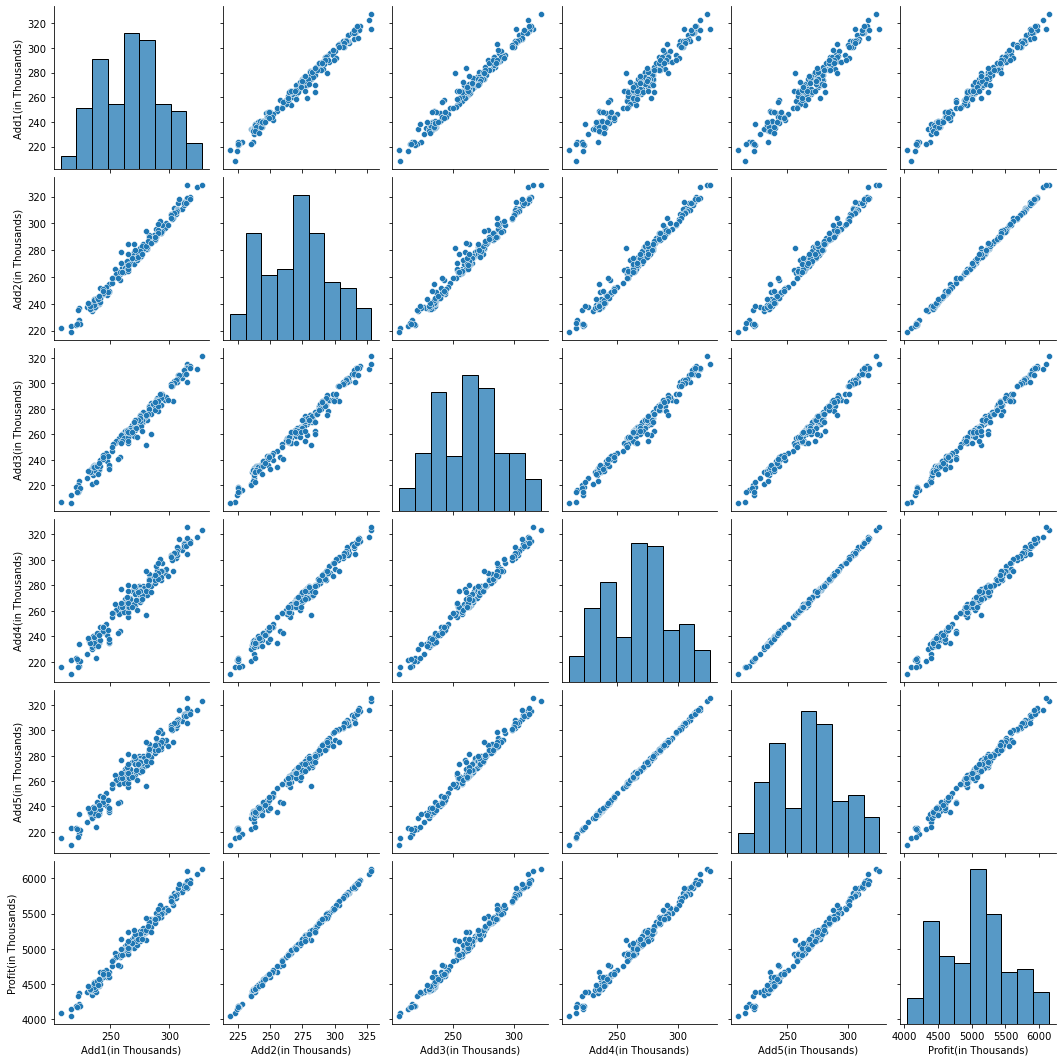

In [29]:
sns.pairplot(data)
plt.show()

The relationship between the amount spent for advertising by the companies and profit generated to each company is higly correlated can be seen from the plot .

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.


# Model Development

In [30]:
# spliting Dataset in Dependent & Independent Variables
y=data['Profit(in Thousands)']
x=data.drop(['Profit(in Thousands)','Date'], axis=1)

# Transforming Data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

# Label encoder

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder = LabelEncoder()
x[:, 4] = labelencoder.fit_transform(x[:, 4])
x1 = pd.DataFrame(x)
x1.head()

,0,1,2,3,4
0,-2.277816,-1.913705,-2.154048,-1.956996,1.0
1,-1.933721,-2.054895,-2.190498,-2.176674,0.0
2,-1.685208,-1.699019,-1.797219,-1.909240,3.0
3,-1.436695,-1.323801,-1.428879,-1.557757,10.0
4,-1.262736,-1.435979,-1.609212,-1.410668,11.0


# Splitting the data into training and testing data

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

# Creating a Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


# Testing the model using the predict function

In [36]:
y_pred = model.predict(x_test)
y_pred

array([4493.47542856, 5920.85009344, 4404.17132667, 4191.09690104,
       5879.77225207, 5728.4570995 , 5225.36004129, 5017.20708115,
       5518.50048803, 4514.5361669 , 4464.39298983, 5140.62769522,
       4761.56856215, 5037.99679605, 4607.62537166, 5730.96667017,
       4923.06764543, 4471.13003287, 4480.41404804, 5065.87262887,
       5043.58147256, 5491.86622825, 4967.8976588 , 5793.23985066,
       6137.89418531, 5247.28949028, 5138.01498476, 5374.12238274,
       5213.37460243, 4899.20400427, 5971.73736355, 5745.17536898,
       5153.91448113, 5805.56140576, 4763.55197181, 4176.42171369,
       5938.64392781, 4916.05059941, 4524.26789701, 5113.25546156,
       4648.76843873, 4349.25380038, 4915.60907176, 4934.63640283,
       5108.50571914, 5167.75877526, 4451.53594637, 4979.96786764,
       5177.62422586, 5861.32146427, 4424.94578227, 4887.08668579,
       5267.58280364, 5088.5390181 , 5163.28317753, 5430.92149939,
       5251.10136638, 5435.65902408, 5134.70214505, 4435.90197

In [37]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9999990697791231
Model Score/Performance on Training data 0.9999987359578061


# Comparing the predicted values and actual values

In [38]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
52,4493.475429,4494.144
181,5920.850093,5921.116
5,4404.171327,4404.686
18,4191.096901,4190.965
188,5879.772252,5880.541
...,...,...
198,5435.659024,5435.316
143,5134.702145,5134.657
24,4435.901978,4435.174
30,4598.586446,4598.292


# Model Evaluation

In [39]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 99.99990695124254


In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 22.167348247603382


In [41]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  47.08221346496295


In [42]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 0.35608895506541766


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [43]:
predict_profit_for= np.array([[219],[312],[309],[298],[320]])

In [44]:
predict_profit_for=predict_profit_for.reshape(1,5)

In [45]:
profit=model.predict(predict_profit_for)

In [46]:
profit[0]

153526.522677657

therefore the predicted Profit(in Thousands) for the values Add1(in Thousands)=290,Add2(in Thousands)=312,Add3(in Thousands)=309,Add4(in Thousands)=298,Add5(in Thousands)=320 is 153526.522677657.

 Thus, the mean absolute error is 0.35608895506550564. Therefore our predicted value can be 0.35608895506550564 units more or less than the actual value.